In [3]:
import numpy as np      # For arrays
import pandas as pd     # Dataframes and manipulation
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# read csv file as Dataframe
sales = pd.read_csv("c:\For Internships & Job Applications\personal project\Sales Retail\supermarket sales\supermarket_sales - Sheet1.csv")
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
print(sales.shape)
print(sales.info())

(1000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin p

In [5]:
# Preparing training and testing datasets
# 70% train 30% test
X = sales.drop(columns=["Total"])
y = sales["Total"]

seed = np.random.randint(0, 1000)
print(seed)

770


In [6]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train.shape, X_test.shape

((700, 16), (300, 16))

In [7]:
X_train.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
479,575-67-1508,A,Yangon,Normal,Male,Electronic accessories,38.60,1,1.930,1/29/2019,11:26,Ewallet,38.60,4.761905,1.930,6.7
554,134-75-2619,A,Yangon,Member,Male,Electronic accessories,19.32,7,6.762,3/25/2019,18:51,Cash,135.24,4.761905,6.762,6.9
147,568-90-5112,C,Naypyitaw,Normal,Male,Health and beauty,66.14,4,13.228,3/19/2019,12:46,Credit card,264.56,4.761905,13.228,5.6
766,801-88-0346,C,Naypyitaw,Normal,Female,Fashion accessories,76.06,3,11.409,1/5/2019,20:30,Credit card,228.18,4.761905,11.409,9.8
630,149-61-1929,A,Yangon,Normal,Male,Sports and travel,64.19,10,32.095,1/19/2019,14:08,Credit card,641.90,4.761905,32.095,6.7


In [8]:
y_train.head()

479     40.530
554    142.002
147    277.788
766    239.589
630    673.995
Name: Total, dtype: float64

In [9]:
X_train_copy = X_train.copy()
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 479 to 24
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               700 non-null    object 
 1   Branch                   700 non-null    object 
 2   City                     700 non-null    object 
 3   Customer type            700 non-null    object 
 4   Gender                   700 non-null    object 
 5   Product line             700 non-null    object 
 6   Unit price               700 non-null    float64
 7   Quantity                 700 non-null    int64  
 8   Tax 5%                   700 non-null    float64
 9   Date                     700 non-null    object 
 10  Time                     700 non-null    object 
 11  Payment                  700 non-null    object 
 12  cogs                     700 non-null    float64
 13  gross margin percentage  700 non-null    float64
 14  gross income             700 n

In [10]:
X_train_copy.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
num_data = X_train_copy.select_dtypes(exclude=["object"])
num_data.head()

,Unit price,Quantity,Tax 5%,cogs,gross margin percentage,gross income,Rating
479,38.60,1,1.930,38.60,4.761905,1.930,6.7
554,19.32,7,6.762,135.24,4.761905,6.762,6.9
147,66.14,4,13.228,264.56,4.761905,13.228,5.6
766,76.06,3,11.409,228.18,4.761905,11.409,9.8
630,64.19,10,32.095,641.90,4.761905,32.095,6.7


In [12]:
num_data.describe()

,Unit price,Quantity,Tax 5%,cogs,gross margin percentage,gross income,Rating
count,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,700.000000
mean,55.240143,5.517143,15.390507,307.810143,4.761905e+00,15.390507,6.980714
std,26.376027,2.957688,11.931019,238.620373,5.244000e-14,11.931019,1.720527
min,10.080000,1.000000,0.508500,10.170000,4.761905e+00,0.508500,4.000000
25%,32.425000,3.000000,5.728500,114.570000,4.761905e+00,5.728500,5.600000
50%,54.405000,6.000000,11.683750,233.675000,4.761905e+00,11.683750,7.000000
75%,77.492500,8.000000,22.626000,452.520000,4.761905e+00,22.626000,8.400000
max,99.960000,10.000000,49.650000,993.000000,4.761905e+00,49.650000,10.000000


<Axes: ylabel='Unit price'>

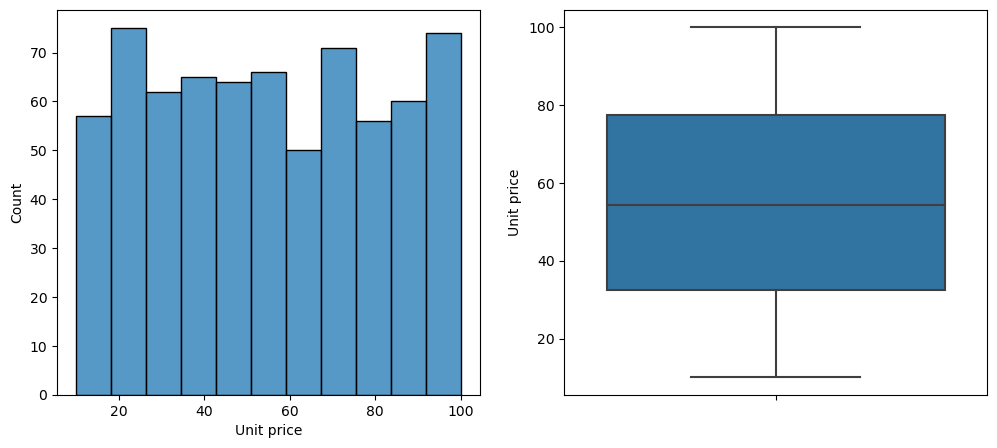

In [13]:
# Visualize data
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=X_train_copy, x="Unit price", ax=ax[0])
sns.boxplot(data=X_train_copy, y="Unit price", ax=ax[1])

In [14]:
def visualize_numeric_feature(dataframe, col_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data=dataframe, x=col_name, ax=ax[0])
    sns.boxplot(data=dataframe, y=col_name, ax=ax[1])

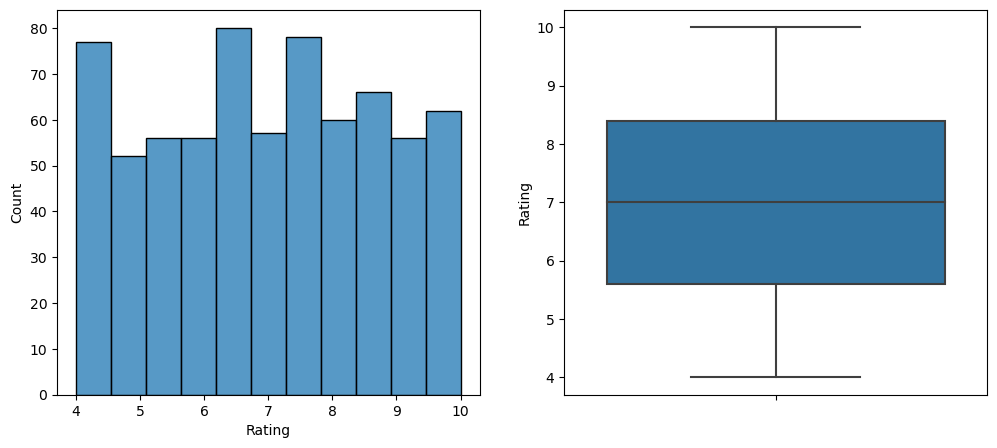

In [18]:
visualize_numeric_feature(X_train_copy, 'Rating')

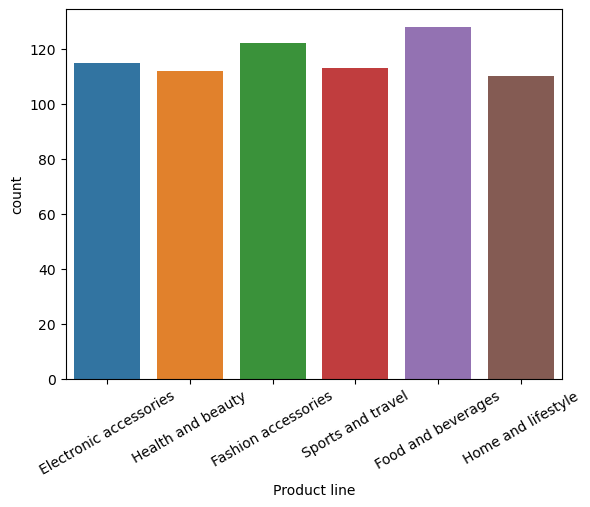

In [23]:
sns.countplot(data=X_train_copy, x="Product line")
plt.xticks(rotation=30);